In [2]:
import numpy as np
import pandas as pd

In [3]:
mall_data=pd.read_csv("F:/talat internship work/Mall_Customers.csv")

In [4]:
mall_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
mall_data.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
X=mall_data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [8]:
from sklearn.preprocessing import StandardScaler
x_scale=StandardScaler()
x_scale=x_scale.fit_transform(X)

E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

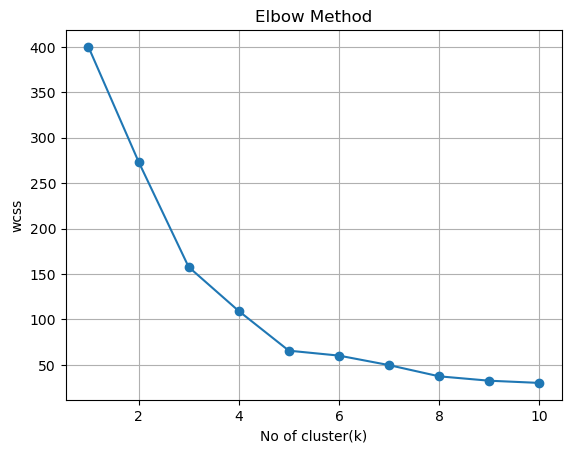

In [12]:
import os
os.environ["OMP_NUM_THREADS"] = "1" 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k , init='k-means++' , random_state=42)
  kmeans.fit(x_scale)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11) , wcss , marker='o')
plt.title('Elbow Method')
plt.xlabel('No of cluster(k)')
plt.ylabel('wcss')
plt.grid(True)
plt.show()

In [13]:
kmeans= KMeans(n_clusters=5 , init='k-means++', random_state=42)
y_kmean= kmeans.fit_predict(x_scale)
mall_data['Cluster']=y_kmean

E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


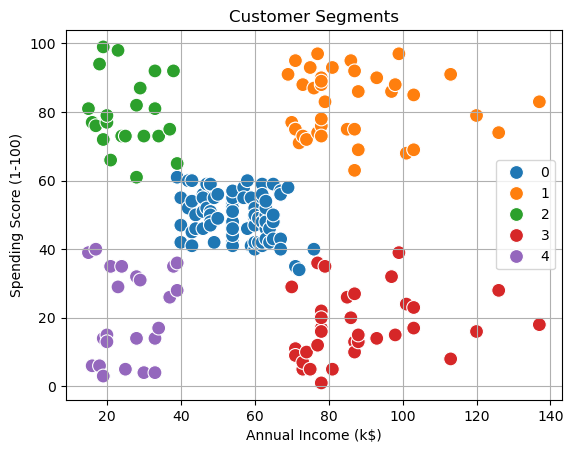

In [14]:
import seaborn as sns

sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='tab10',
    data=mall_data,
    s=100
)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.5, min_samples=5)
y_dbscan= dbscan.fit_predict(x_scale)
mall_data['DBSCAN Cluster']=y_dbscan

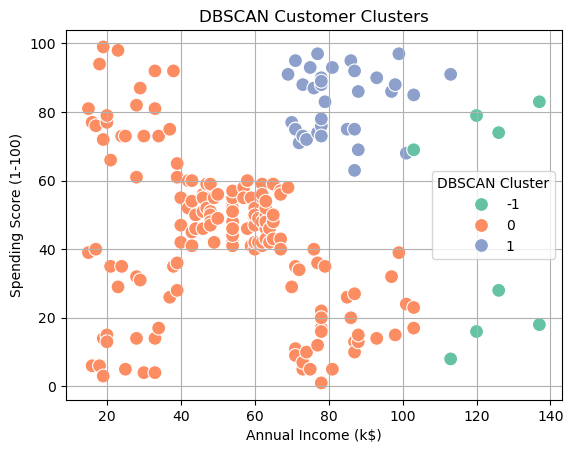

In [16]:
sns.scatterplot(
    x='Annual Income (k$)', 
    y='Spending Score (1-100)', 
    hue='DBSCAN Cluster', 
    palette='Set2', 
    data=mall_data,
    s=100
)
plt.title('DBSCAN Customer Clusters')
plt.grid(True)
plt.show()

In [17]:
mall_data.groupby('Cluster')['Spending Score (1-100)'].mean().round(2)


Cluster
0    49.52
1    82.13
2    79.36
3    17.11
4    20.91
Name: Spending Score (1-100), dtype: float64

In [19]:
mall_data.groupby('DBSCAN Cluster')['Spending Score (1-100)'].mean().round(2)


DBSCAN Cluster
-1    46.88
 0    43.10
 1    82.80
Name: Spending Score (1-100), dtype: float64

In [21]:
mall_data[mall_data['DBSCAN Cluster'] != -1].groupby('DBSCAN Cluster')['Spending Score (1-100)'].mean().round(2)


DBSCAN Cluster
0    43.1
1    82.8
Name: Spending Score (1-100), dtype: float64